In [ ]:
!ls /content

drive  sample_data


In [ ]:
import google.colab
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

colab_path = "/content/drive/My Drive/kisia_titanic"

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv(colab_path + '/titanic_train.csv')
df_test = pd.read_csv(colab_path + '/titanic_test.csv')
print("studied data : {}, testing data : {}".format(len(df_train), len(df_test)))

studied data : 891, testing data : 418


In [ ]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#    replace_embarked = df['Embarked'].value_counts(dropna=False).idxmax()
df_train['Embarked'].value_counts(dropna=True)

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
df_train['Embarked'].value_counts(dropna=False).idxmax()

'S'

In [ ]:
df_test.shape

(418, 11)

위의 데이터셋 설명
이름은 그렇다 치고 **Emarked**는 승선한 장소를 의미
나머지 Cabin, parch, SipSp는 후에 정리하자

Pclass는 몇등석인지

In [ ]:
df_test.dtypes

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


이름, 나이 승선위치 등 11개의 컬럼을 가지고** 생존가능성을 추측**해가는 것이 이번 프로젝트의 목표이다

Feature = 파생/종속변수, Label = target, 목적/종속변수

In [ ]:
(df_train['Survived'].value_counts()/len(df_train)*100).round(2)
#round는 소수점 몇자리에서 올림할지를 정하는 함수

,count
Survived,
0,61.62
1,38.38


In [ ]:
print(df_train.isnull().sum(),'\n')
print((df_train.isnull().mean()*100).round(2))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Feature, Label 확인하기
타이타닉 학습 데이터에서 중요한 필드는 "Survived" 필드인데 이걸 label이라 지칭하면 target, 목적변수, 종속변수라고 한다,
label을 쉽게 이해하자면

y = ax+b에서 y이다.

각 feature를 전처리하기 위하여 결측치, 이상치, 인코딩 처리를 해야 한다.

In [ ]:
#학습의 속도를 균잏하게 해주기 위해 정규화를 한다,

#결측치 확인(널을 확읺)
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
replace_embarked = df_train['Embarked'].value_counts().idxmax()
print(replace_embarked)

S


**결측치란** null과 같은 기입되어있지 않은 값으로, 이런 값들이 모델의 학습능력을 떨군다.

따라서 이 값을 채워줘야 하는데 Embarked와 같은 값은 몇개 되지 않으니 가장 많이 나온 값을 찾아서

df_train['Embarked'].value_counts().idxmax() 채워넣는다

In [ ]:
df_train['Embarked'] = df_train['Embarked'].fillna(replace_embarked)

In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_train[df_train['Age'].isna()].head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [ ]:
df_train['Age_isna'] = df_train['Age'].isna().astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_isna
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df_train[df_train['Name'].str.contains('Master')].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_isna
count,40.000000,40.000000,40.000000,36.000000,40.000000,40.000000,40.000000,40.000000
mean,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,0.100000
std,301.717518,0.500641,0.627878,3.619872,1.910833,0.540062,28.051752,0.303822
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,8.516700,0.000000
25%,165.750000,0.000000,2.000000,1.000000,1.000000,1.000000,18.750000,0.000000
50%,345.000000,1.000000,3.000000,3.500000,1.000000,1.000000,29.062500,0.000000
75%,764.000000,1.000000,3.000000,8.000000,4.000000,2.000000,39.171875,0.000000
max,870.000000,1.000000,3.000000,12.000000,8.000000,2.000000,151.550000,1.000000


In [ ]:
master_age = 3.5

"**마스터**"란 명칭은 어린이를 뜻하기 때문에 이들의 나이를 추정할 때 평균으로 두기에는 오류가 크다.

따라서 그들의 평균 나이를 따로 지정해주자

In [ ]:
df_train[df_train['Name'].str.contains('Miss.')].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_isna
count,182.000000,182.000000,182.000000,146.000000,182.000000,182.000000,182.000000,182.000000
mean,408.884615,0.697802,2.307692,21.773973,0.714286,0.549451,43.797873,0.197802
std,246.775812,0.460477,0.849989,12.990292,1.431961,0.804184,66.027199,0.399441
min,3.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000,0.000000
25%,213.000000,0.000000,1.250000,14.125000,0.000000,0.000000,7.951050,0.000000
50%,381.500000,1.000000,3.000000,21.000000,0.000000,0.000000,15.620850,0.000000
75%,612.250000,1.000000,3.000000,30.000000,1.000000,1.000000,41.034400,0.000000
max,889.000000,1.000000,3.000000,63.000000,8.000000,2.000000,512.329200,1.000000


In [ ]:
miss_age = 21

In [ ]:
mrs_age = 35.0

In [ ]:
mr_age = 31

In [ ]:
df_train[(df_train['Name'].str.contains('Master') \
          + df_train['Name'].str.contains('Mr\.') \
          + df_train['Name'].str.contains('Mrs\.') \
          + df_train['Name'].str.contains('Miss') \
          + df_train['Name'].str.contains('Dr\.')) == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_isna
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,0
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,0
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S,0
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,0
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,0
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,0
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,0
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,0
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,0


In [ ]:
df_train['Name'].str.contains('Master').sum() \
+ df_train['Name'].str.contains('Mr\.').sum() \
+ df_train['Name'].str.contains('Mrs\.').sum() \
+ df_train['Name'].str.contains('Miss').sum() \
+ df_train['Name'].str.contains('Dr\.').sum()

위의 경우에는 각 직급, 명칭에 따랄 나이를 평균을 내어 나이에 대한 결측치를 제거하는 과정이다.

In [ ]:
replace_value = df_train['Age'].mean().round(2)

In [ ]:
df_train['Age'] = df_train['Age'].fillna(replace_value)

대신에 간단히 평균을 내버리는 방법도 있다.

In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


보다시피 age 의 결측치가 사라진 것을 확인할 수 있다.

In [ ]:
df_train['Cabin_isna'] = df_train['Cabin'].isnull().astype(int)

#결측치 처리, Cabin은 의미가 없는 값====아직 실행하지 말도록
df_train = df_train.drop(columns = ['Cabin'])

SibSp : 수평동반자

Parch : 수직동반자

In [ ]:
df_train['Pclass'].value_counts().sort_index()

,count
Pclass,
1,216
2,184
3,491


In [ ]:
df_train['Sex'].value_counts().sort_index()

,count
Sex,
female,314
male,577


In [ ]:
df_train['Parch'].value_counts().sort_index()

,count
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


([<matplotlib.axis.XTick at 0x7ee1d53092d0>,
 [Text(1, 0, 'Age'), Text(2, 0, 'Fare')])

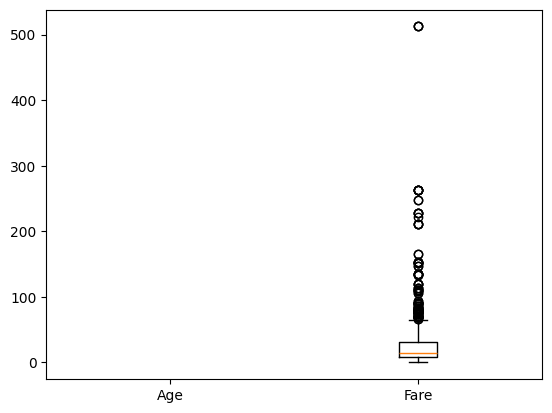

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([df_train['Age'],df_train['Fare']])
plt.xticks([1,2],['Age','Fare'])

위의 그래프의 박스를 보면 여러 모양이 있는데 이거 책에 있단다 확인해서 정리하자(box ploit)

그리고 fare 금액대를 보면 동그라미 하나만 뚝 떨어져있는걸 볼 수 있는데 이걸 "**이상치**" 로 판별할 수 있으나

그당시 초스위트룸이 있었단 정보 하에 이를 무시하고 넘어갈 수 있다.

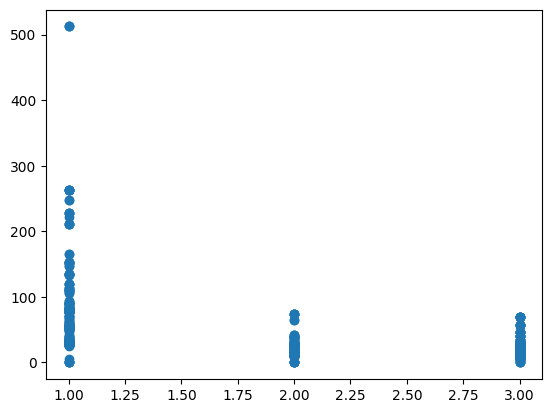

In [ ]:
plt.scatter(df_train['Pclass'], df_train['Fare'])

추가하자면 몇명이 티켓값을 사서 이렇게 사격 분포가 나뉘어졌느냐도 판단해야 한다.

In [ ]:
df_train.sort_values(by=['Fare'], ascending = False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_isna,Cabin_isna
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,0,0
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,0,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,0,0
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S,0,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,S,0,0


In [ ]:
from sklearn import preprocessing

In [ ]:
columns_to_scale = ['Age', 'Fare']
#age, fare에 대해 z-score 정규화====> 스탠다드 스케일러를 썼다고 판단해야 한다
#예를들어 MinMaxScaler가 있는데 이 경우에는 0~1 사이로 정규화 하는 것이다.
scaler_train = preprocessing.StandardScaler()
scaler_train = scaler_train.fit(df_train[columns_to_scale])
#나이와 금액의 평균과 표준편차를 구한다.
df_train[columns_to_scale] = scaler_train.transform(df_train[columns_to_scale])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_isna,Cabin_isna
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.592494,1,0,A/5 21171,-0.502445,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638776,1,0,PC 17599,0.786845,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.284677,0,0,STON/O2. 3101282,-0.488854,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407912,1,0,113803,0.420730,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,0.407912,0,0,373450,-0.486337,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.207722,0,0,211536,-0.386671,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.823357,0,0,112053,-0.044381,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.000054,1,2,W./C. 6607,-0.176263,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.284677,0,0,111369,-0.044381,C,0,0


#인코딩 부분입니다

In [ ]:
#dummies라고 어떤 문자값을 01로 바꿔주는 것을 의미한다.
#왜 인코딩이라 하면 이 코드 이후 값들의 변화가 어떻게 되냐면 sex가 sex_male, sex_female로 나뉘고 거기의 값이 true, false로 bool값이 되어서
#이게 머신러닝 학습에 도움이 커진다.
df_train = pd.get_dummies(df_train, columns = ['Sex', 'Embarked'])
df_train.iloc[:, -5:]

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,False,True,False,False,True
1,True,False,True,False,False
2,True,False,False,False,True
3,True,False,False,False,True
4,False,True,False,False,True
...,...,...,...,...,...
886,False,True,False,False,True
887,True,False,False,False,True
888,True,False,False,False,True
889,False,True,True,False,False


In [ ]:
#보면 컬럼 분리, 및 내부에 true, false로 값을 나누어주는 과정을 인코딩이라 한다.(ps, 인코딩이 값의 형식변환을 의미하니 크게 보면 맞기도 하나?)
df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Age_isna,Cabin_isna,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.592494,1,0,A/5 21171,-0.502445,0,1,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638776,1,0,PC 17599,0.786845,0,0,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.284677,0,0,STON/O2. 3101282,-0.488854,0,1,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407912,1,0,113803,0.420730,0,0,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.407912,0,0,373450,-0.486337,0,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",-0.207722,0,0,211536,-0.386671,0,1,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",-0.823357,0,0,112053,-0.044381,0,0,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.000054,1,2,W./C. 6607,-0.176263,1,1,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",-0.284677,0,0,111369,-0.044381,0,0,False,True,True,False,False


여기서 중요한 점은 **알고리즘별로 위의 컬럼분리가 좋게 작용할 수도 있고,**

 별로 효과가 없을수도 있다 ps. 강사님이 말하시길 뉴럴넼의 경우 크게 영향받고, 트리?의 경우에는 영향이 적다고 한다.

In [ ]:
df_train['Ticket'].sort_values().values[-10:]

array(['W./C. 6607', 'W./C. 6608', 'W./C. 6608', 'W./C. 6608',
       'W./C. 6608', 'W./C. 6609', 'W.E.P. 5734', 'W/C 14208',
       'WE/P 5735', 'WE/P 5735'], dtype=object)

In [ ]:
df_train['Name'].sort_values().values[-10:]

array(['Yrois, Miss. Henriette ("Mrs Harbeck")', 'Zabour, Miss. Hileni',
       'Zabour, Miss. Thamine', 'Zimmerman, Mr. Leo',
       'de Messemaeker, Mrs. Guillaume Joseph (Emma)',
       'de Mulder, Mr. Theodore', 'de Pelsmaeker, Mr. Alfons',
       'del Carlo, Mr. Sebastiano', 'van Billiard, Mr. Austin Blyler',
       'van Melkebeke, Mr. Philemon'], dtype=object)

티켓의 value는 몰라도 이름은 활용 가능성이 보인다.

In [ ]:
df_train['Name'].str.extract("([A-Za-z]+)\.").value_counts(dropna = False)

,count
0,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [ ]:
df_train['Name_has_title'] = df_train['Name'].str.contains('Master|Dr|Rev|Major|Col|Capt|Jonkheer|Don|Countess|Sir').astype(int)

In [ ]:
df_train['Name_has_title'].value_counts()

,count
Name_has_title,
0,814
1,77


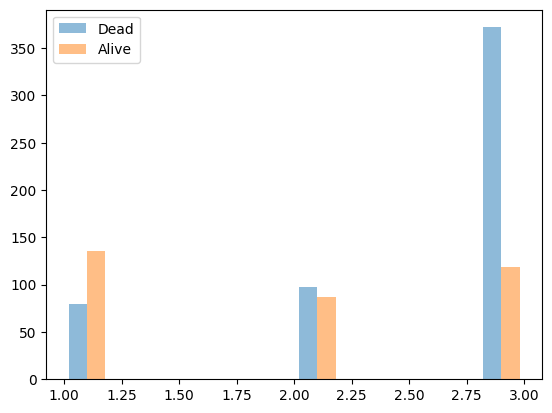

In [ ]:
# Pclass에 따른 Survived(사망자/생존자) 분포
hist1 = df_train[df_train['Survived']==0]['Pclass']
hist2 = df_train[df_train['Survived']==1]['Pclass']
plt.hist([hist1, hist2], label=['Dead', 'Alive'], alpha=0.5)
plt.legend(loc=0)

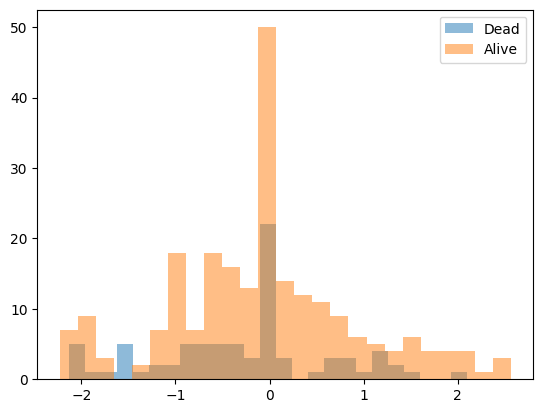

In [ ]:
# Pclass에 따른 Survived(사망자/생존자) 분포
hist1 = df_train[(df_train['Survived']==0) & (df_train['Sex_female'])]['Age']
hist2 = df_train[(df_train['Survived']==1) & (df_train['Sex_female'])]['Age']
plt.hist(hist1, label='Dead', bins=25, alpha=0.5)
plt.hist(hist2, label='Alive', bins=25, alpha=0.5)
plt.legend(loc=0)

In [ ]:
# 상관관계 계산
cols_to_corr = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_has_title']
df_train[cols_to_corr].corr().round(2)

,Pclass,Age,SibSp,Parch,Fare,Name_has_title
Pclass,1.00,-0.33,0.08,0.02,-0.55,-0.05
Age,-0.33,1.00,-0.23,-0.18,0.09,-0.17
SibSp,0.08,-0.23,1.00,0.41,0.16,0.23
Parch,0.02,-0.18,0.41,1.00,0.22,0.17
Fare,-0.55,0.09,0.16,0.22,1.00,0.04
Name_has_title,-0.05,-0.17,0.23,0.17,0.04,1.00


In [ ]:
import numpy as np

([<matplotlib.axis.YTick at 0x7ee1d30be0d0>,
 [Text(0, 0.5, 'Pclass'),
  Text(0, 1.5, 'Age'),
  Text(0, 2.5, 'SibSp'),
  Text(0, 3.5, 'Parch'),
  Text(0, 4.5, 'Fare'),
  Text(0, 5.5, 'Name_has_title'),
  Text(0, 6.5, 'Survived')])

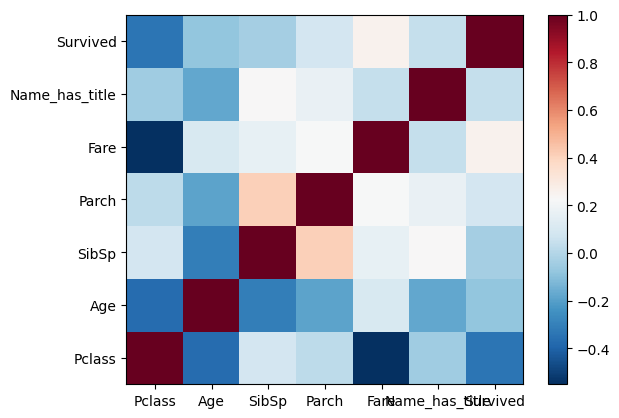

In [ ]:
# 상관관계 시각화
cols_to_corr = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_has_title','Survived']
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(df_train[cols_to_corr].corr().round(2), cmap='RdBu_r')
fig.colorbar(c, ax=ax)
plt.xticks(np.arange(0.5, len(cols_to_corr), 1), cols_to_corr)
plt.yticks(np.arange(0.5, len(cols_to_corr), 1), cols_to_corr)

여태의 정리 ===> 필요없는건 버리고, 없는 값은 평균이나 최소, 최대값으로 처리하고, 또 널값이 중요해보일 때는 column을 추가했다

In [ ]:
def temp_preprocessing(df_orig, mode='train', replace_embarked = None, replace_age=  None, scaler = None):
  df = df_orig.copy()
  if mode == 'train':
    replace_embarked = df['Embarked'].value_counts(dropna=False).idxmax()
    replace_age = df['Age'].mean().round(2)
  df['Embarked'] = df['Embarked'].fillna(replace_embarked)
  df['Age_isna'] = df['Age'].isna().astype(int)
  df['Age'] = df['Age'].fillna(replace_age)


  if mode == 'train':
    scaler = preprocessing.StandardScaler()
    scaler = scaler.fit(df[['Age','Fare']])
  df[['Age','Fare']] = scaler.transform(df[['Age','Fare']])

  df = pd.get_dummies(df, columns = ['Sex', 'Embarked'])
  df['Name_has_title'] = df['Name'].str.contains('Master|Dr|Rev|Major|Col|Capt|Jonkheer|Don|Countess|Sir').astype(int)


  df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

  return df, replace_embarked, replace_age, scaler

#훈련용 데이터 전처리 시작

In [ ]:
df_train = pd.read_csv(colab_path + '/titanic_train.csv')
df_train, replace_embarked, replace_age, scaler = temp_preprocessing(df_train,'train')

In [ ]:
#Feature(X), Label(y) 분리
target_col = ['Survived','PassengerId']
y = df_train[target_col]
y = y.set_index('PassengerId')
X = df_train.drop(columns=[target_col[0]])
X = X.set_index('PassengerId')



In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,Age_isna,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_has_title
PassengerId,,,,,,,,,,,,
1,3,-0.592494,1,0,-0.502445,0,False,True,False,False,True,0
2,1,0.638776,1,0,0.786845,0,True,False,True,False,False,0
3,3,-0.284677,0,0,-0.488854,0,True,False,False,False,True,0
4,1,0.407912,1,0,0.420730,0,True,False,False,False,True,0
5,3,0.407912,0,0,-0.486337,0,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,-0.207722,0,0,-0.386671,0,False,True,False,False,True,1
888,1,-0.823357,0,0,-0.044381,0,True,False,False,False,True,0
889,3,0.000054,1,2,-0.176263,1,True,False,False,False,True,0


In [ ]:
import sklearn.model_selection
from sklearn import preprocessing

In [ ]:
from sklearn.model_selection import train_test_split


train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
train_X.isnull().sum()

,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Age_isna,0
Sex_female,0
Sex_male,0
Embarked_C,0
Embarked_Q,0


In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(C=20, max_iter=1000, random_state=42)
model1.fit(train_X, train_y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=20, max_iter=1000, random_state=42)

In [ ]:
# 모델 학습 및 예측
from sklearn.svm import SVC
model2 = SVC(kernel = 'linear', probability=True, random_state=42)
model2.fit(train_X, train_y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
# 모델 학습
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
# model3 = RandomForestClassifier(n_estimators=8, max_depth = 3, random_state=42)
model3.fit(train_X, train_y)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [ ]:
from xgboost import XGBClassifier

# model4 = XGBClassifier(n_estimators=8, max_depth = 3, random_state=42)
model4 = XGBClassifier(n_estimators=100, random_state=42)
model4.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:

# Logistic Regression모델 평가
print(model1.score(train_X, train_y))  # accuracy
print(model1.score(val_X, val_y))

0.8154093097913323
0.8022388059701493


In [ ]:
#SVM 모델 평가
print(model2.score(train_X, train_y))  # accuracy
print(model2.score(val_X, val_y))

0.797752808988764
0.7910447761194029


In [ ]:
# Random Forest모델 평가
print(model3.score(train_X, train_y))  # accuracy
print(model3.score(val_X, val_y))

0.9823434991974318
0.7985074626865671


In [ ]:
# XGBoost 모델 평가
print(model4.score(train_X, train_y))  # accuracy
print(model4.score(val_X, val_y))

0.9727126805778491
0.7835820895522388


In [ ]:
# AUC Score
from sklearn.metrics import roc_auc_score
print('AUC value (Logistic Regression): {}'.format(roc_auc_score(val_y, model1.predict(val_X))))
print('AUC value (SVM): {}'.format(roc_auc_score(val_y, model2.predict(val_X))))
print('AUC value (RandomForest): {}'.format(roc_auc_score(val_y, model3.predict(val_X))))
print('AUC value (XGBoost): {}'.format(roc_auc_score(val_y, model4.predict(val_X))))

AUC value (Logistic Regression): 0.7955758306076779
AUC value (SVM): 0.7794227348367475
AUC value (RandomForest): 0.7831525793309233
AUC value (XGBoost): 0.7730533080851552


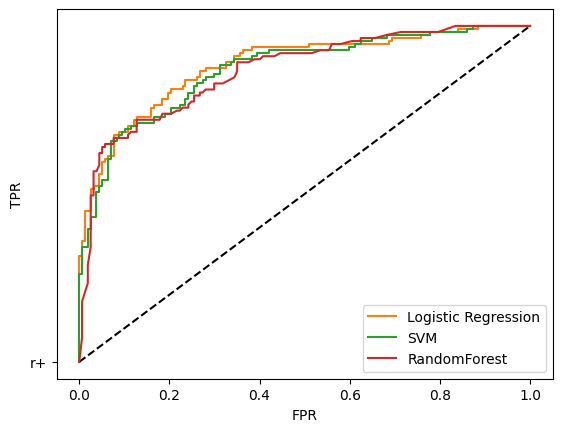

In [ ]:
# ROC Curve 플롯팅
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(val_y, model1.predict_proba(val_X)[:,1])
plt.plot([0,1], [0,1], "k--", "r+") #0.5 기준선
plt.plot(fpr, tpr, label='Logistic Regression')
fpr2, tpr2, thresholds2 = roc_curve(val_y, model2.predict_proba(val_X)[:,1])
plt.plot(fpr2, tpr2, label='SVM')
fpr3, tpr3, thresholds3 = roc_curve(val_y, model3.predict_proba(val_X)[:,1])
plt.plot(fpr3, tpr3, label='RandomForest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=0)

위의 그래프를 보면 Logiatic Regression이 가장 위에 있는 것을 확인할 수 있다
강사님 설명으로는 저 그래프가 차지하는 범위가 제일 크기 때문에

본 데이터셋에 대하여  Accuracy가 가장 높은 모델이라고 한다

In [ ]:
import pickle
#모델 저잘

with open(colab_path +'/saved_model1.pickle','wb') as fw:
  pickle.dump(model1, fw)

In [ ]:
with open(colab_path + '/saved_model1.pickle','rb') as  f:
  logicModel = pickle.load(f)

In [ ]:
# 모델 평가
print(logicModel.score(train_X, train_y))  # accuracy
print(logicModel.score(val_X, val_y))

0.8154093097913323
0.8022388059701493


#Testing Data Premanaging

In [ ]:
# 테스트 데이터 전처리
df_test = pd.read_csv(colab_path + '/titanic_test.csv')
df_test, replace_embarked, replace_age, scaler = temp_preprocessing(df_test, 'test', replace_embarked, replace_age, scaler)
df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Age_isna,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_has_title
0,892,3,0.369435,0,0,-0.490783,0,False,True,False,True,False,0
1,893,3,1.331365,1,0,-0.507479,0,True,False,False,False,True,0
2,894,2,2.485680,0,0,-0.453367,0,False,True,False,True,False,0
3,895,3,-0.207722,0,0,-0.474005,0,False,True,False,False,True,0
4,896,3,-0.592494,1,1,-0.401017,0,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.000054,0,0,-0.486337,1,False,True,False,False,True,0
414,1306,1,0.715730,0,0,1.544246,0,True,False,True,False,False,1
415,1307,3,0.677253,0,0,-0.502445,0,False,True,False,False,True,0
416,1308,3,0.000054,0,0,-0.486337,1,False,True,False,False,True,0


In [ ]:
test_y = pd.read_csv(colab_path + '/titanic_gender_submission.csv')
test_y = test_y['Survived']


In [ ]:
#결측치 처리
test_y = pd.read_csv(colab_path + '/titanic_gender_submission.csv')
test_y = test_y['Survived']

replace_fare = df_train['Fare'].mean().round(2)
df_test['Fare'] = df_test['Fare'].fillna(replace_fare)
test_X = df_test.set_index('PassengerId')

In [ ]:
print(model4.score(test_X, test_y))

0.8181818181818182


In [ ]:
pred_y = logicModel.predict(test_X)
df_pred_y = pd.DataFrame(pred_y, columns=['Survived'])
df_pred_y['PassengerId'] = df_test['PassengerId']
df_pred_y = df_pred_y.set_index('PassengerId')
df_pred_y.to_csv(colab_path + '/my_submission.csv')

In [ ]:
# 최종 생존율 예측
pred_y = logicModel.predict(test_X)
df_result = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived': pred_y})
df_pred_y.to_csv(colab_path + '/my_submission2.csv')

#강의 종료 및 Accuracy 올려보기


##후기


교육을 들으면서 인공지능 모델을 처음 써봤고, 데이터를 가공하고 조정하여 모델이 학습하도록 하는 과정을 경험했다.

내가 코드를 짜고 고민하지는 않았지만 이걸 바탕으로 내가 더 뭔갈 할 수 있을 것이다. 정확도를 올리든지 말이다.


##올리기 위한 계획

목적은 모델이 학습을 더 정확하게 하도록 하여 테스트 데이터셋을 학습시켰을 때

그 정확도가 95퍼를 넘기도록 하는 것이다.

그러기 위해서는 고민도 해보고 다른 사람들이 했던 프로젝트들을 참고도 해야할 것이다.

1. 기존 코드가 데이터를 정제한 방법==> 함수로 정리했었으니 그걸 확인하자

In [ ]:
def temp_preprocessing(df_orig, mode='train', replace_embarked = None, replace_age=  None, scaler = None):
  df = df_orig.copy()
  if mode == 'train':
    # Embarked의 결측치인 NaN을 제거하기 위해 그 값을 Embarked 중 가장 높은 비율을 차지하는 값으로 변경
    replace_embarked = df['Embarked'].value_counts(dropna=False).idxmax()
    # Age가 NaN으로 되있는 값들이 있어서 이를 평균값(소수점 2자리에서 반올림)으로 설정
    replace_age = df['Age'].mean().round(2)
  # 널값을 채워넣는다
  df['Embarked'] = df['Embarked'].fillna(replace_embarked)
  # 나이가 불명이라는 것이 학습에 도움이 될수도 있다. 상상을 해보자면
  # 실종되어서 나이를 못찾았거나, 나이를 적지 않아도 될정도이 노인/어린아이였던가
  df['Age_isna'] = df['Age'].isna().astype(int)
  df['Age'] = df['Age'].fillna(replace_age)


  if mode == 'train':
    # Standard Scaler, 평균이 0이고 표준편차가 1인 정규분포 형태를 만들어준다
    scaler = preprocessing.StandardScaler()
    #age와 fare에 맞게 평균과 표준편차를 설정
    scaler = scaler.fit(df[['Age','Fare']])
  df[['Age','Fare']] = scaler.transform(df[['Age','Fare']])
  #get dummies 메서드로 sex와 embarked 컬럼의 튜플에 대하여 값을 male, female에서 0,1로 바꿔준다
  df = pd.get_dummies(df, columns = ['Sex', 'Embarked'])
  #특이한 이름들의 경우에는 그 수가 작아서 예외로 둔다는 건데, 생존률과 비교해보니 그다지 연관성을 가지지 않는다
  df['Name_has_title'] = df['Name'].str.contains('Master|Dr|Rev|Major|Col|Capt|Jonkheer|Don|Countess|Sir').astype(int)

  #이름, ticket, cabin(호실명)의 경우에는 생존률과 큰 의미없는 데이터라 판단되어 버린다.
  df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

  return df, replace_embarked, replace_age, scaler

PassengerId 승객들 id인데 여기서 볼게 있나?==> 인덱스 정도의 값들의 배열이라 버려도 됨    
Pclass	몇등석 칸에 탔는지, 이는 선박의 높이와 연관이 있어 생존률에 영향을 미친다.   
Name	아까의 mr, miss 등의 분류로 생존률, 사망률을 더 세분화할 수 있을 것이다  
Sex	확정된 사실이니 이만 마친다   
Age	연령이 승객의 생존률에 큰 영향을 미치진 않으나, 나이가 완전 어리거나, 완전 높은 경우 생존률이 높은 경향을 보인다.     
==> 이 데이터를 버릴수도 있는데 이들의 수가 적기 때문. 허나 이를 더해보긴 하자  
SibSp	뭔 값인지 모르겠다  
Parch	동승자에 대한 값
Ticket 숫자만 적힌 것이 있고, 영어가 섞인 것이 있는데 이를 분류해서 데이터를 추가해볼수도 있을듯  
Fare 티켓 가격이 높아지면 생존률에 영향이 있을까? 단순히 사람이 많이 타서 가격이 오를수도 있으니 이를 분류하려 column을 추가해보자  
Embarked	이 값을 버리면 도움이 될수 있을까?  
Age_isna	이 사람들이 얼마나 살고 죽었는지를 봐서 버리는 것도 좋음  
Cabin_isna 호실 이름인데, 이게 같거나 다른것데 대한 데이터를 추가할수 있을듯
